In [1]:
%load_ext autoreload
from coffea import util, processor
from msdprocessor5 import msdProcessor

from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import distributed
import dask
import awkward as ak
import hist
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from hist import Hist
import dask_awkward
import os

In [2]:
#Trying to loop through as many files as possible and stack histograms
directory_path = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/"

singlefile = ["/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root"]

#Create an array with all the files in /data-mc
fileset = []
for filename in os.listdir(directory_path):
    if filename.endswith(".root"):
        # Add the full file path to the fileset list
        fileset.append(os.path.join(directory_path, filename))
print(fileset)

['/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ggF.root', '/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/VBF.root', '/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/WminusH.root', '/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ZH.root', '/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/QCD_Pt470to600.root']


In [3]:
# Start summing events
file = fileset[0]
events = NanoEventsFactory.from_root({file: "/Events"},
    schemaclass=PFNanoAODSchema
    ).events()

/uscms/home/tbabenko/nobackup/miniconda3/envs/fastjet/lib/python3.12/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [4]:
#Add up all the events
result = msdProcessor().process(events)
print(result)

[{'b0': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills), 'b1': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills), 'b2': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills), 'b3': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills), 'b4': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills), 'b5': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0

In [5]:
#Compute the matrix of results from the matrix of events

full_compute = dask.compute(result)

# save the output file
outfile = "histogram.coffea"
util.save(full_compute, outfile)
print("saved " + outfile)

#print full compute

print(full_compute)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------
saved histogram.coffea
([{'b0': Hist(Regular(40, 0, 400, name='msoftdro

{'b0': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=295.339, variance=139.338), 'b1': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=294.867, variance=139.115) (WeightedSum(value=295.339, variance=139.338) with flow), 'b2': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=288.734, variance=136.221) (WeightedSum(value=295.339, variance=139.338) with flow), 'b3': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=266.088, variance=125.537) (WeightedSum(value=295.339, variance=139.338) with flow), 'b4': Hist(Regular(40, 0, 400, name='msoftdrop', label='Jet $m_\\mathrm{softdrop}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=238.725, variance=112.627) (WeightedSum(v

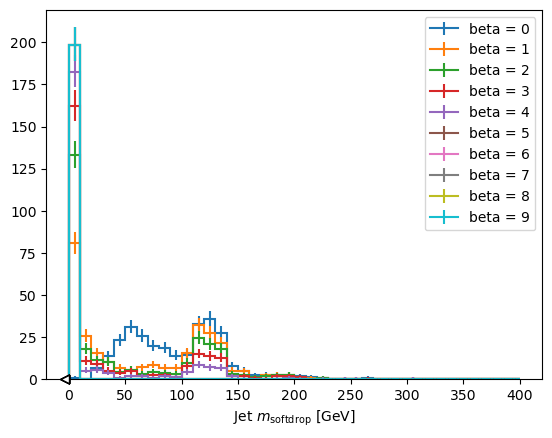

In [6]:
compute = full_compute
# Define the number of betas to iterate over
n_betas = 10  # Adjust this to the number of betas you have

# Initialize a matrix to store the compute values
print(compute[0][1])
compute_matrix = [compute[0][1][f'b{beta}'] for beta in range(n_betas)]

# Plotting the histograms for each beta
fig, ax = plt.subplots()
# Loop through the compute matrix to plot each histogram
for beta in range(n_betas):

    compute_matrix[beta].plot1d(ax=ax, label=f'beta = {beta}')
plt.legend()
plt.show()
# Add legend and show the plot



In [7]:
num_bins = h.axes[0].size
msoftdrop_bins = np.linspace(0, 400, num_bins + 1)  # Adjust 400 and number of bins as per your range
msoftdrop_axis = hist.axis.Regular(num_bins, msoftdrop_bins[0], msoftdrop_bins[-1], name="msoftdrop", label="Softdrop Mass")

# Define a categorical axis for beta values
beta_axis = hist.axis.IntCategory([0, 1, 2, 3, 4], name="beta", label="Beta")

# Create an empty 3D histogram with msoftdrop and beta axes
hist_3d = hist.Hist(msoftdrop_axis, beta_axis)

# Extract frequencies for each `beta` value and fill them into `hist_3d`
msoftdrop_vals = np.repeat(hist_3d.axes[0].centers, 5)  # repeat for each beta layer
beta_vals = np.tile(np.array([0, 1, 2, 3, 4]), num_bins)  # repeat beta values across msoftdrop bins

frequencies = np.concatenate([h.view(), i.view(), j.view(), k.view(), l.view()])

# Use the `fill` method to populate `hist_3d`
hist_3d.fill(msoftdrop=msoftdrop_vals, beta=beta_vals, weight=frequencies)

# Prepare data for 3D plotting
msoftdrop_vals, beta_vals = np.meshgrid(
    hist_3d.axes[0].centers,  # Centers of msoftdrop bins
    hist_3d.axes[1].centers   # Centers of beta bins
)
frequencies = hist_3d.view().T  # Transpose to match meshgrid shape

# Plotting in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(
    msoftdrop_vals, beta_vals, frequencies,
    cmap="viridis", edgecolor='none'
)
ax.set_xlabel("Softdrop Mass (msoftdrop)")
ax.set_ylabel("Beta")
ax.set_zlabel("Frequency")
ax.set_title("3D Histogram of msoftdrop vs Beta")

# Add a color bar to show frequency values
fig.colorbar(surf, ax=ax, label="Frequency")
plt.show()

NameError: name 'h' is not defined

In [ ]:

#Plot the hist of an individual file
#Single Jet

h = compute[0]['ExampleHistogram']

fig, ax = plt.subplots()
h.plot1d(ax=ax, norm=mcolors.LogNorm())  # Colors and Normalized Log Plot
plt.show()


In [ ]:
# Another individual jet
h = compute[2]['ExampleHistogram']

fig, ax = plt.subplots()
h.plot1d(ax=ax)  # For 2D histograms like pt vs eta
plt.show()


In [ ]:
# More Individual Jets
h = compute[1]['ExampleHistogram'][{'eta':sum}]

fig, ax = plt.subplots()
h.plot2d(ax=ax)  # For 2D histograms like pt vs eta
plt.show()


In [ ]:
#Make the first entry in the summation of the same type as the rest of the matrix, that is, 'ExampleHistogram' Type
summation = compute[1]['ExampleHistogram']

#Sum all the histograms of this same type to the first histogram
for index in compute[1:]:
    summation +=index['ExampleHistogram']

#Plot the summed hist 

fig, ax = plt.subplots()
summation.plot1d(ax=ax)
plt.show()


In [ ]:
#Full file Plot
summation[{'eta':sum}].plot1d()

# This sums over eta and draws pT

In [ ]:
i = compute[1]['ExampleHistogram']
i

In [ ]:
j = compute[2]['ExampleHistogram']
j

In [ ]:
k = compute[3]['ExampleHistogram']
k

In [ ]:
l = compute[4]['ExampleHistogram'][{'eta':sum,'pt':sum}]
l

In [ ]:
events.fields

In [ ]:
events['q1pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['q2pt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['hpt'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['detaqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['dphiqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));

In [ ]:
output['mqq'].plot1d(overlay='wc')
plt.yscale('log')
#plt.ylim(1e-4, 1000)

plt.legend(ncol=3,bbox_to_anchor=(1.0,1.1));